### Loading the Dataset and viewing the first 8 rows

### Importing necessary modules

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math as m
from sklearn.preprocessing import PolynomialFeatures

data_set = pd.read_csv("/Users/omobolaniyi/Documents/Folder/bidsignore/RT_analysis/flanker_RT_data.tsv", sep='\t')
data_set["output"] = data_set['IncongMix'] - data_set['CongMix']
print(data_set.head(8))

   Subject  Age  Sex  Otherlang  RVMT       AoA  Immersion    L2_Home  \
0      201   33    1     0.0000    46  3.321928  -1.925999  -7.151543   
1      202   33    1     0.7500    40  2.321928   0.395929   3.543518   
2      203   35    1     0.0625    45  3.459432   3.508629   2.903210   
3      204   28    1     0.0000    39  2.321928   6.725949   6.828151   
4      205   29    0     0.1875    47 -3.321928   5.459863  10.287608   
5      207   34    0     0.0000    41  3.584963   4.208427   3.550585   
6      209   29    1     0.0000    42  4.087463   5.274899  -3.195234   
7      210   22    1     0.0000    43  2.807355   4.840529   2.426765   

   L2_Social  YrL2qualLog   Immqual  CongMix  Congruent1  Control  IncongMix  \
0  10.772155    -0.061401 -3.341037      445         408      400        514   
1  44.247063     3.544321 -0.019109      449         421      381        533   
2  49.909285     3.584963  3.093591      384         330      311        465   
3  61.363197     3.639

In [10]:
X = data_set[['Age', 'Otherlang', 'Immersion' ]]
y = data_set['output']

#splitting the dataset to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
model = LinearRegression()
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_train_poly = poly.fit_transform(X_train)
model.fit(X_train_poly, y_train)

#predicting for comparison
y_pred = model.predict(X_test_poly)

### Plotting to see how good the prediction is

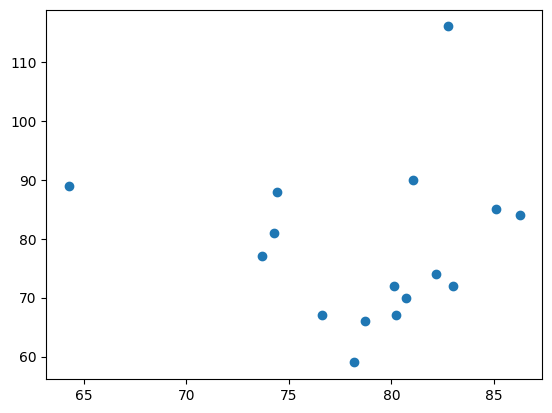

In [11]:
plt.scatter(y_pred, y_test)
plt.show()

### Calculating the Root Mean Squared Error and scoring the model

In [12]:
mse = mean_squared_error(y_test, y_pred)
print(m.pow(mse, 0.5))

print(model.score(X_test_poly, y_test))

14.154800237280552
-0.14574893689265078
